In [315]:
#Bibliotecas
import copy #Allows us to create copies of objects in memory
import math #Math functionality
import numpy as np #Numpy for working with arrays
import matplotlib.pyplot as plt #Plotting functionality 

## Dados da Estrutura

In [316]:
#Constantes

E = 200*10**9 #módulo de elasticidade (N/m²)
A = 0.005 #(m²)
xFac = 100 #Fator de escala para plotar

#Coordenada dos nós [x,y] em ordem crescente A, B, C, .... AA, AB
nodes = np.array([[0,0], ##1
                 [1,1], 
                 [1,0],
                 [2,1],
                 [2,0], ##5
                 [3,1],
                 [3,0],
                 [4,1],
                 [4,0],
                 [5,1], ##10
                 [5,0], 
                 [6,1],
                 [6,0],
                 [7,1],
                 [7,0], ##15
                 [8,1], 
                 [8,0],
                 [5,2],
                 [6,2],
                 [5,3], ##20
                 [6,3],
                 [5,-1],
                 [6,-1],
                 [5,-2],
                 [6,-2], ##25
                 [5,-3],
                 [6,-3],
                 [5,-4],
                 [6,-4],
                 [5,-5], ##30
                 [6,-5],
                 [5,-6],
                 [6,-6],
                 [5,-7],
                 [6,-7]])

#Barras [no_i, no_j]
members = np.array([[1,2], #A
                   [2,3],
                   [3,1],
                   [2,4],
                   [3,4],
                   [4,5],
                   [3,5],
                   [4,6],
                   [5,6],
                   [6,7],
                   [5,7],
                   [6,8],
                   [7,8],
                   [8,9],
                   [7,9],
                   [8,10],
                   [9,10],
                   [10,11],
                   [9,11], #s
                   [10,12],
                   [11,12],
                   [12,13],
                   [11,13],
                   [12,14],
                   [13,14],
                   [14,15],
                   [13,15],
                   [14,16],
                   [15,16],
                   [16,17],
                   [15,17], ##AE
                   [10,18],
                   [18,19],
                   [10,19],
                   [12,19], ##AI
                   [18,20],
                   [20,21], ##AK
                   [18,21],
                   [19,21],
                   [2,20],
                   [16,21], ##AO
                   [11,22],
                   [13,22],
                   [13,23],
                   [22,23], ##AS
                   [22,24],
                   [23,24],
                   [23,25],
                   [24,25], #AAX
                   [24,26],
                   [25,26],
                   [25,27],
                   [26,27], #AAA
                   [26,28],
                   [27,28],
                   [27,29],
                   [28,29], #AAE
                   [28,30],
                   [29,30],
                   [29,31],
                   [30,31], #AAI
                   [30,32],
                   [31,32],
                   [31,33],
                   [32,33],
                   [32,34],
                   [33,34],
                   [33,35]])

#Suportes
restrainedDoF = [63,64,65,66] #Graus de liberdade restringido pelos suportes

#Carregamentos
DoF = np.zeros(2*len(nodes))
forceVector = np.array([DoF])
forceVector[0][2*17-1] = (5.5/2.5)*-200000
forceVector[0][2*1-1]  = -200000
forceVector = forceVector.T 

print(forceVector)
#============================================================#

[[      0.]
 [-200000.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [-440000.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]
 [      0.]]


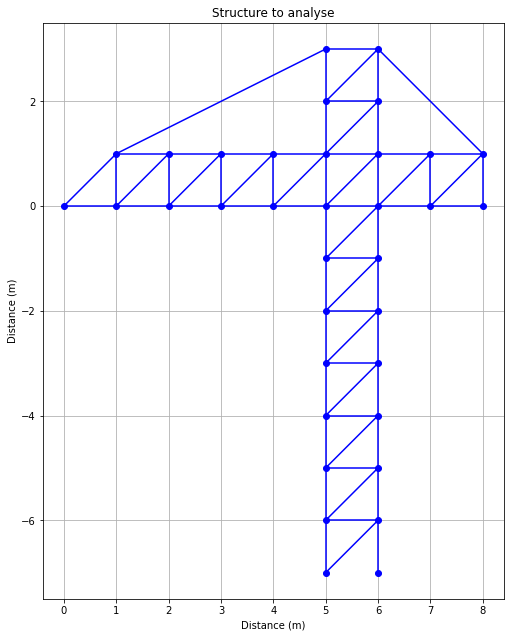

In [317]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,2])
fig.gca().set_aspect('equal', adjustable = 'box')

#plotando cada membro

for mbr in members:
    node_i = mbr[0]
    node_j = mbr[1]
    
    ix = nodes[node_i-1,0]
    iy = nodes[node_i-1,1]
    jx = nodes[node_j-1,0]
    jy = nodes[node_j-1,1]
    
    #indice do DOF de cada membro
    ia = 2*node_i-2
    ib = 2*node_i-1
    ja = 2*node_j-2
    jb = 2*node_j-1
    
    
    axes.plot([ix,jx],[iy,jy],'b')

    

#plotar os nos
for node in nodes:
    axes.plot([node[0]],[node[1]],'bo')
    
axes.set_xlabel('Distance (m)')
axes.set_ylabel('Distance (m)')
axes.set_title('Structure to analyse')
axes.grid()
plt.show()

### Calcula o comprimento e orientação de cada membro da estrutura

In [318]:
#Defini uma função que calcula a posição e orientação dos membrs da estrutura

def memberOrientation(memberNo):
    memberIndex = memberNo-1 #indice que identifica cada membro
    node_i = members[memberIndex][0]
    node_j = members[memberIndex][1]
    
    xi = nodes[node_i-1][0] #coordenada x do no_i
    yi = nodes[node_i-1][1] #coordenada y do no_i
    xj = nodes[node_j-1][0] #coordenada x do no_j
    yj = nodes[node_j-1][1] #coordenada y do no_j
    
    #Angulo de cada membro com relação ao eixo horizontal
    
    dx = xj-xi 
    dy = yj-yi
    mag = math.sqrt(dx**2+dy**2)
    memberVector = np.array([dx,dy])
    
    #Identifica o quadrante e aplica o offset adequado
    
    if(dx>0 and dy==0):
        theta = 0
    elif(dx==0 and dy>0):
        theta = math.pi/2
    elif(dx<0 and dy==0):
        theta = math.pi
    elif(dx==0 and dy<0):
        theta = 3*math.pi/2
    elif(dx>0 and dy>0):
        #0<theta<90
        refVector = np.array([1,0]) #Vetor indicando O eixo x +
        theta = math.acos(refVector.dot(memberVector)/mag) #Calcula o angulo entre os vetores
    elif(dx<0 and dy>0):
         #90<theta<190
        refVector = np.array([0,1]) 
        theta = math.acos(refVector.dot(memberVector)/mag) + math.pi/2
    elif(dx<0 and dy<0):
         #180<theta<270
        refVector = np.array([-1,0]) 
        theta = math.acos(refVector.dot(memberVector)/mag) + math.pi
    else:
         #270<theta<360
        refVector = np.array([0,-1]) 
        theta = math.acos(refVector.dot(memberVector)/mag) + math.pi/2
    
    return[theta, mag]
        
        

In [319]:
# Calcula a orientação e comprimento de cada membro
orientations = np.array([])
lengths = np.array([])

for n, mbr in enumerate(members):
    [angle, length] = memberOrientation(n+1)
    orientations = np.append(orientations,angle)
    lengths = np.append(lengths, length)
    
print(np.rad2deg(orientations)) #imprimi a orientação de cada membro em angulo

[ 45.         270.         180.           0.          45.
 270.           0.           0.          45.         270.
   0.           0.          45.         270.           0.
   0.          45.         270.           0.           0.
  45.         270.           0.           0.          45.
 270.           0.           0.          45.         270.
   0.          90.           0.          45.          90.
  90.           0.          45.          90.          26.56505118
 135.         270.         225.         270.           0.
 270.         225.         270.           0.         270.
 225.         270.           0.         270.         225.
 270.           0.         270.         225.         270.
   0.         270.         225.         270.           0.
 270.         225.         270.        ]


## Calcula a matrix de rigidez global

In [320]:
#Função para calculo da matrix de rigidez global e carga axial
def calculateKg(memberNo):

    theta = orientations[memberNo-1]
    mag = lengths[memberNo-1]
        
    c = math.cos(theta)
    s = math.sin(theta)
    
    #elementos da matrix de rigidez
    K11 = (E*A/mag)*np.array([[c**2,c*s],[c*s,s**2]]) 
    K12 = (E*A/mag)*np.array([[-c**2,-c*s],[-c*s,-s**2]])  
    K21 = (E*A/mag)*np.array([[-c**2,-c*s],[-c*s,-s**2]])   
    K22 = (E*A/mag)*np.array([[c**2,c*s],[c*s,s**2]]) 
    
    return [K11, K12, K21,K22]

Matrix de rigidez Kp

In [321]:
nDoF = np.amax(members)*2 ##Define o numero de graus de liberdade da estrutura
Kp = np.zeros([nDoF,nDoF])

for n, mbr in enumerate(members):
    [K11,K12,K21,K22] = calculateKg(n+1)
    
    node_i = mbr[0]
    node_j = mbr[1]
    
    ia = 2*node_i-2
    ib = 2*node_i-1
    ja = 2*node_j-2
    jb = 2*node_j-1
    
    Kp[ia:ib+1,ia:ib+1] = Kp[ia:ib+1,ia:ib+1] + K11
    Kp[ia:ib+1,ja:jb+1] = Kp[ia:ib+1,ja:jb+1] + K12
    Kp[ja:jb+1,ia:ib+1] = Kp[ja:jb+1,ia:ib+1] + K21
    Kp[ja:jb+1,ja:jb+1] = Kp[ja:jb+1,ja:jb+1] + K22
    
    

Matrix de rigidez reduzida

In [322]:
restrainedIndex = [x - 1 for x in restrainedDoF] #Index for each restrained DoF (list comprehension)

#Reduce to structure stiffness matrix by deleting rows and columns for restrained DoF
Ks = np.delete(Kp,restrainedIndex,0) #Delete rows
Ks = np.delete(Ks,restrainedIndex,1) #Delete columns
Ks = np.matrix(Ks) # Convert Ks from numpy.ndarray to numpy.matrix to use build in inverter function

print(Ks)

[[ 1.35355339e+09  3.53553391e+08 -3.53553391e+08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.53553391e+08  3.53553391e+08 -3.53553391e+08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.53553391e+08 -3.53553391e+08  1.53243883e+09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.35355339e+09
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   3.37445951e-23  1.83697020e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.83697020e-07  1.00000000e+09]]


## Calcular os deslocamentos

In [323]:
forceVectorRed = copy.copy(forceVector) #Cria uma cópia do vetor de forças
forceVectorRed = np.delete(forceVectorRed, restrainedIndex,0)
U = Ks.I*forceVectorRed

## Calcular as reações de apoio

In [324]:
UG = np.zeros(nDoF)

c=0
for i in np.arange(nDoF):
    if i in restrainedIndex:
        UG[i] = 0
    else:
        UG[i] = U[c]
        c=c+1
        
UG = np.array([UG]).T
FG = np.matmul(Kp,UG)


## Calcuar as forças atuando em cada barra 

In [327]:
mbrForces = np.array([])

for n,mbr in enumerate(members):
    theta = orientations[n]
    mag = lengths[n]
    
    node_i = mbr[0]
    node_j = mbr[1]
    
    ia = 2*node_i-2
    ib = 2*node_i-1
    ja = 2*node_j-2
    jb = 2*node_j-1
    
    #Matrix transformada
    c = math.cos(theta)
    s = math.sin(theta)
    T = np.array([[c,s,0,0],[0,0,c,s]])
    
    disp = np.array([[UG[ia], UG[ib], UG[ja], UG[jb] ]]).T
    disp_local = np.matmul(T,disp)[0]
    F_axial = (A*E/mag)*(disp_local[1]-disp_local[0])
    
    mbrForces = np.append(mbrForces,F_axial)
    
print(np.round(mbrForces[38]))

-236244.0


# Plotando

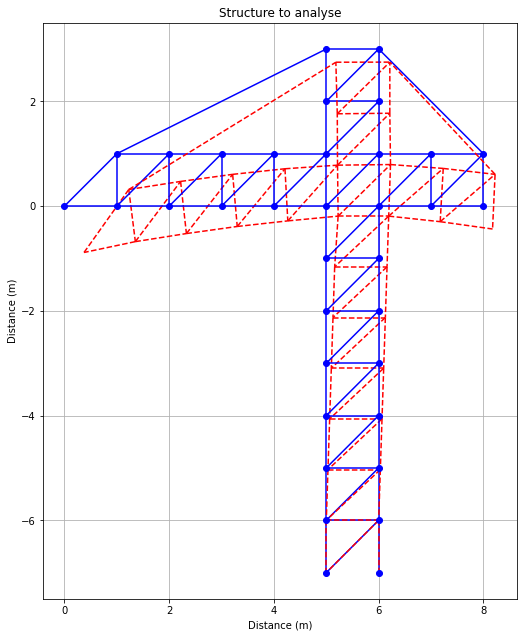

In [326]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,2])
fig.gca().set_aspect('equal', adjustable = 'box')

#plotando cada membro

for mbr in members:
    node_i = mbr[0]
    node_j = mbr[1]
    
    ix = nodes[node_i-1,0]
    iy = nodes[node_i-1,1]
    jx = nodes[node_j-1,0]
    jy = nodes[node_j-1,1]
    
    #indice do DOF de cada membro
    ia = 2*node_i-2
    ib = 2*node_i-1
    ja = 2*node_j-2
    jb = 2*node_j-1
    
    
    axes.plot([ix,jx],[iy,jy],'b')
    axes.plot([ix + UG[ia,0]*xFac, jx + UG[ja,0]*xFac],[iy + UG[ib,0]*xFac, jy + UG[jb,0]*xFac],'--r')
    

#plotar os nos
for node in nodes:
    axes.plot([node[0]],[node[1]],'bo')
    
axes.set_xlabel('Distance (m)')
axes.set_ylabel('Distance (m)')
axes.set_title('Structure to analyse')
axes.grid()
plt.show()